In [245]:
# Import necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set floating point precision option for pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Import seaborn library and set context and style
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Import warnings and set filter to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import time library
from time import time

# Import matplotlib ticker and scipy stats
import matplotlib.ticker as tkr
from scipy import stats

# Import statistical tools for time series analysis
from statsmodels.tsa.stattools import adfuller

# Import preprocessing from sklearn
from sklearn import preprocessing

# Import partial autocorrelation function from statsmodels
from statsmodels.tsa.stattools import pacf

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

# Import math library
import math

# Import necessary functions from keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Import mean squared error and mean absolute error from sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Import early stopping from keras callbacks
from keras.callbacks import EarlyStopping

In [246]:
data = pd.read_csv('household_power_consumption.txt', delimiter=';')

In [247]:
# Print the number of rows and columns in the data
print('Number of rows and columns:', data.shape)

# Display the first 5 rows of the data
data.head(5)

Number of rows and columns: (2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [249]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [250]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column
# by combining the two columns and converting to datetime format
data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [251]:
# Convert the 'Global_active_power' column to numeric format
# and remove any rows with NaN values
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])

In [252]:
# Convert the 'date_time' column to datetime format
data['date_time'] = pd.to_datetime(data['date_time']) 

In [253]:
# Create new columns for year, quarter, month, and day
data['year'] = data['date_time'].apply(lambda x: x.year)
data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
data['month'] = data['date_time'].apply(lambda x: x.month)
data['day'] = data['date_time'].apply(lambda x: x.day)

In [254]:
# Keep only the columns 'date_time', 'Global_active_power', 'year', 'quarter', 'month', 'day'
data = data.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]

In [255]:
# Sort the data by date_time in ascending order
data.sort_values('date_time', inplace=True, ascending=True)

In [256]:
# Reset the index of the data
data = data.reset_index(drop=True)

In [257]:
# Create a new column 'weekday' that indicates if the day is a weekday (1) or weekend (0)
data['weekday'] = data['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [258]:
# Print the number of rows and columns in the data
print('Number of rows and columns:', data.shape)

# Print the minimum and maximum date_time values
print('Minimum date_time:', data.date_time.min())
print('Maximum date_time:', data.date_time.max())

# Display the last 5 rows of the data
data.tail(5)

Number of rows and columns: (2049280, 7)
Minimum date_time: 2006-12-16 17:24:00
Maximum date_time: 2010-12-11 23:59:00


,date_time,Global_active_power,year,quarter,month,day,weekday
2049275,2010-12-11 23:55:00,0.6900,2010,4,12,11,0
2049276,2010-12-11 23:56:00,0.6880,2010,4,12,11,0
2049277,2010-12-11 23:57:00,0.6880,2010,4,12,11,0
2049278,2010-12-11 23:58:00,0.6880,2010,4,12,11,0
2049279,2010-12-11 23:59:00,0.6880,2010,4,12,11,0


In [259]:
# Test for Normality of the Global Active Power Data

# Import the required libraries
import scipy.stats as stats

# Calculate the test statistics and p-value
stat, p = stats.normaltest(data.Global_active_power)

# Print the results
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Set the significance level
alpha = 0.05

# Make a decision on the test result
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=724881.795, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 4.218671866132123
Skewness of normal distribution: 1.7862320846320832


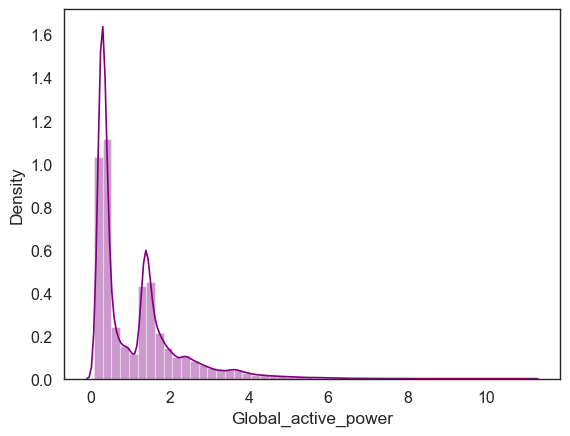

In [260]:
sns.distplot(data.Global_active_power,color='purple')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))

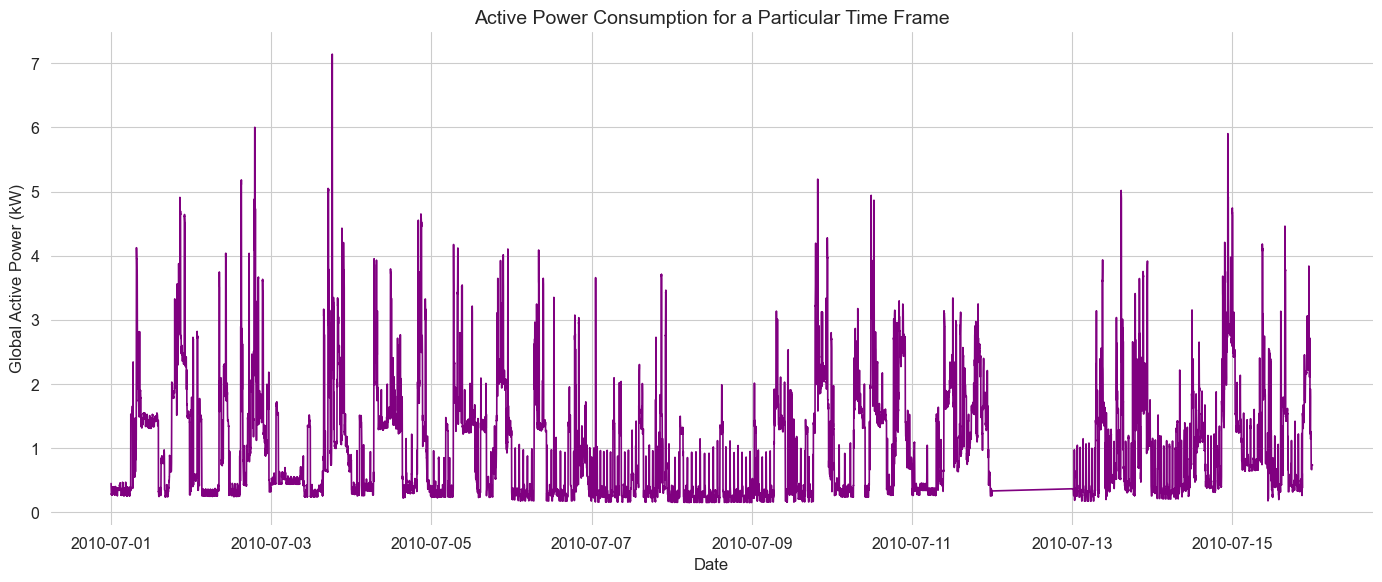

In [261]:
data1 = data[(data.date_time >= '2010-07-01') & (data.date_time < '2010-7-16')]

plt.figure(figsize=(14,6))
plt.plot(data1.date_time, data1.Global_active_power, color='purple')
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

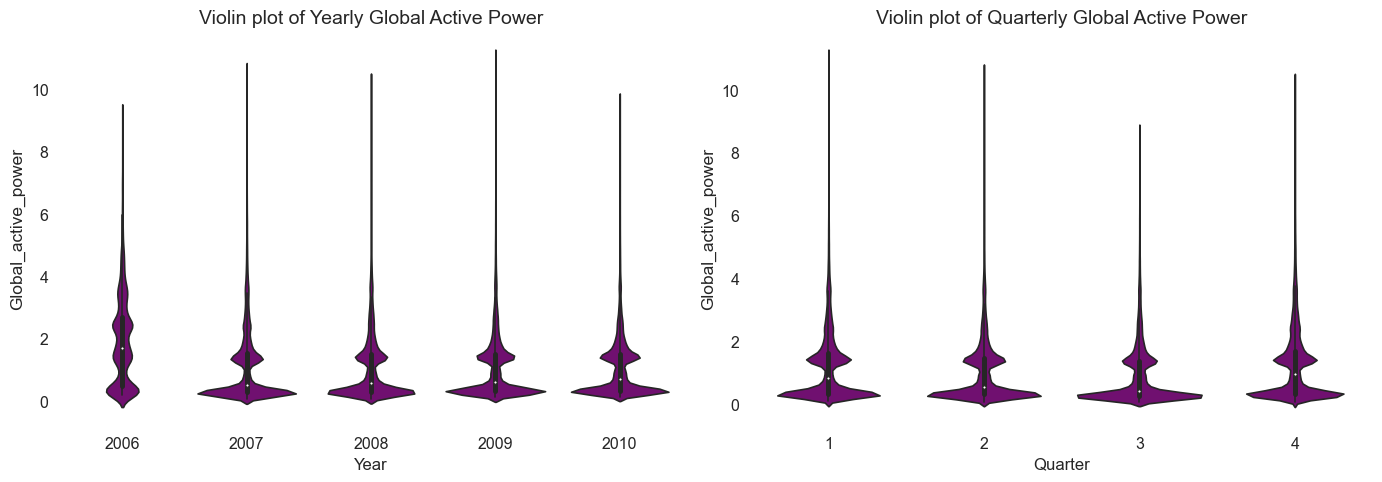

In [262]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots
plt.figure(figsize=(14,5))

# Plot the first subplot showing the violinplot of yearly global active power
plt.subplot(1,2,1)
# Adjust the subplot's width
plt.subplots_adjust(wspace=0.2)
# Create the violinplot using Seaborn's violinplot function
sns.violinplot(x="year", y="Global_active_power", data=data, color='purple')
# Label the x-axis
plt.xlabel('Year', fontsize=12)
# Add a title to the plot
plt.title('Violin plot of Yearly Global Active Power', fontsize=14)
# Remove the top and right spines of the plot
sns.despine(left=True, bottom=True)
# Add a tight layout to the plot
plt.tight_layout() 

# Plot the second subplot showing the violinplot of quarterly global active power
plt.subplot(1,2,2)
# Create the violinplot using Seaborn's violinplot function
sns.violinplot(x="quarter", y="Global_active_power", data=data, color='purple')
# Label the x-axis
plt.xlabel('Quarter', fontsize=12)
# Add a title to the plot
plt.title('Violin plot of Quarterly Global Active Power', fontsize=14)
# Remove the top and right spines of the plot
sns.despine(left=True, bottom=True)
# Add a tight layout to the plot
plt.tight_layout()

                         count      mean    std       min       25%       50%  \
Global_active_power 20159.0000    0.9794 0.8599    0.1540    0.3320    0.5940   
year                20159.0000 2010.0000 0.0000 2010.0000 2010.0000 2010.0000   
quarter             20159.0000    3.0000 0.0000    3.0000    3.0000    3.0000   
month               20159.0000    7.0000 0.0000    7.0000    7.0000    7.0000   
day                 20159.0000    7.7139 4.3330    1.0000    4.0000    7.0000   
weekday             20159.0000    0.7143 0.4518    0.0000    0.0000    1.0000   

                          75%       max  
Global_active_power    1.4340    7.1400  
year                2010.0000 2010.0000  
quarter                3.0000    3.0000  
month                  7.0000    7.0000  
day                   11.0000   15.0000  
weekday                1.0000    1.0000  


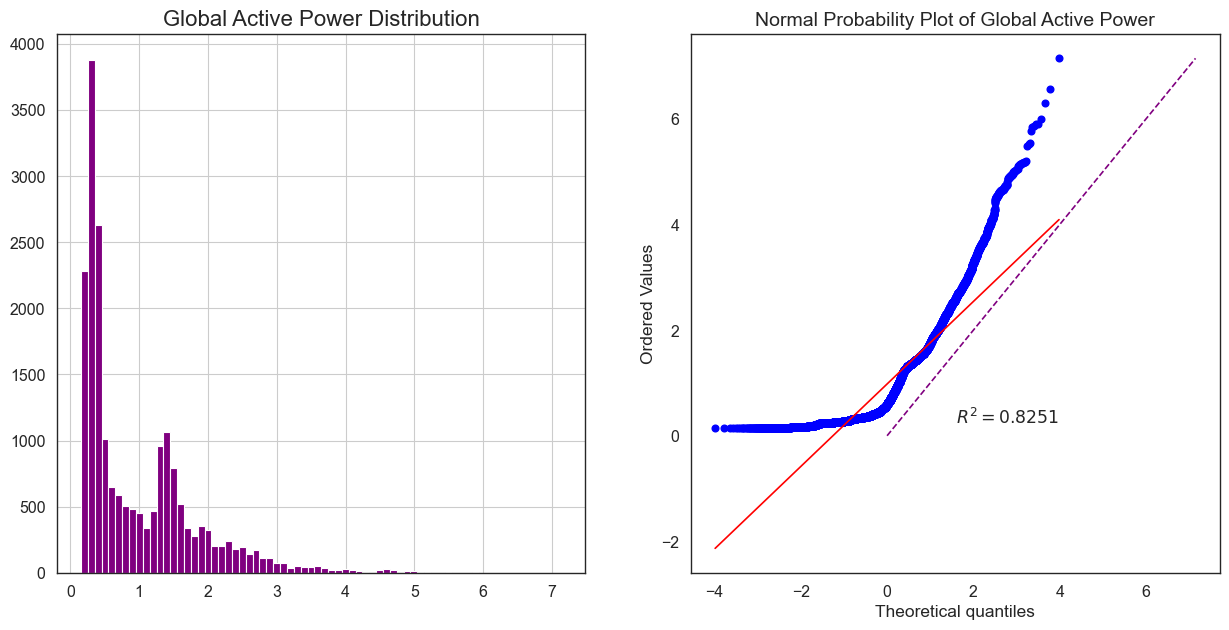

In [263]:
# Plotting the histogram and normal probability plot for 'Global_active_power' column
plt.figure(figsize=(15,7))

# Histogram of 'Global_active_power' column
plt.subplot(1,2,1)
data1['Global_active_power'].hist(bins=70, color='purple')
plt.title('Global Active Power Distribution', fontsize=16)

# Normal Probability Plot of 'Global_active_power' column
plt.subplot(1,2,2)
# Create the normal probability plot using stats.probplot
stats.probplot(data1['Global_active_power'], plot=plt, fit=True, rvalue=True)
# Add a line to the plot
plt.plot([0, max(data1['Global_active_power'])], [0, max(data1['Global_active_power'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Printing the summary statistics of 'Global_active_power' column
print(data1.describe().T)

In [264]:
data1=data.loc[:,['date_time','Global_active_power']]
data1.set_index('date_time',inplace=True)

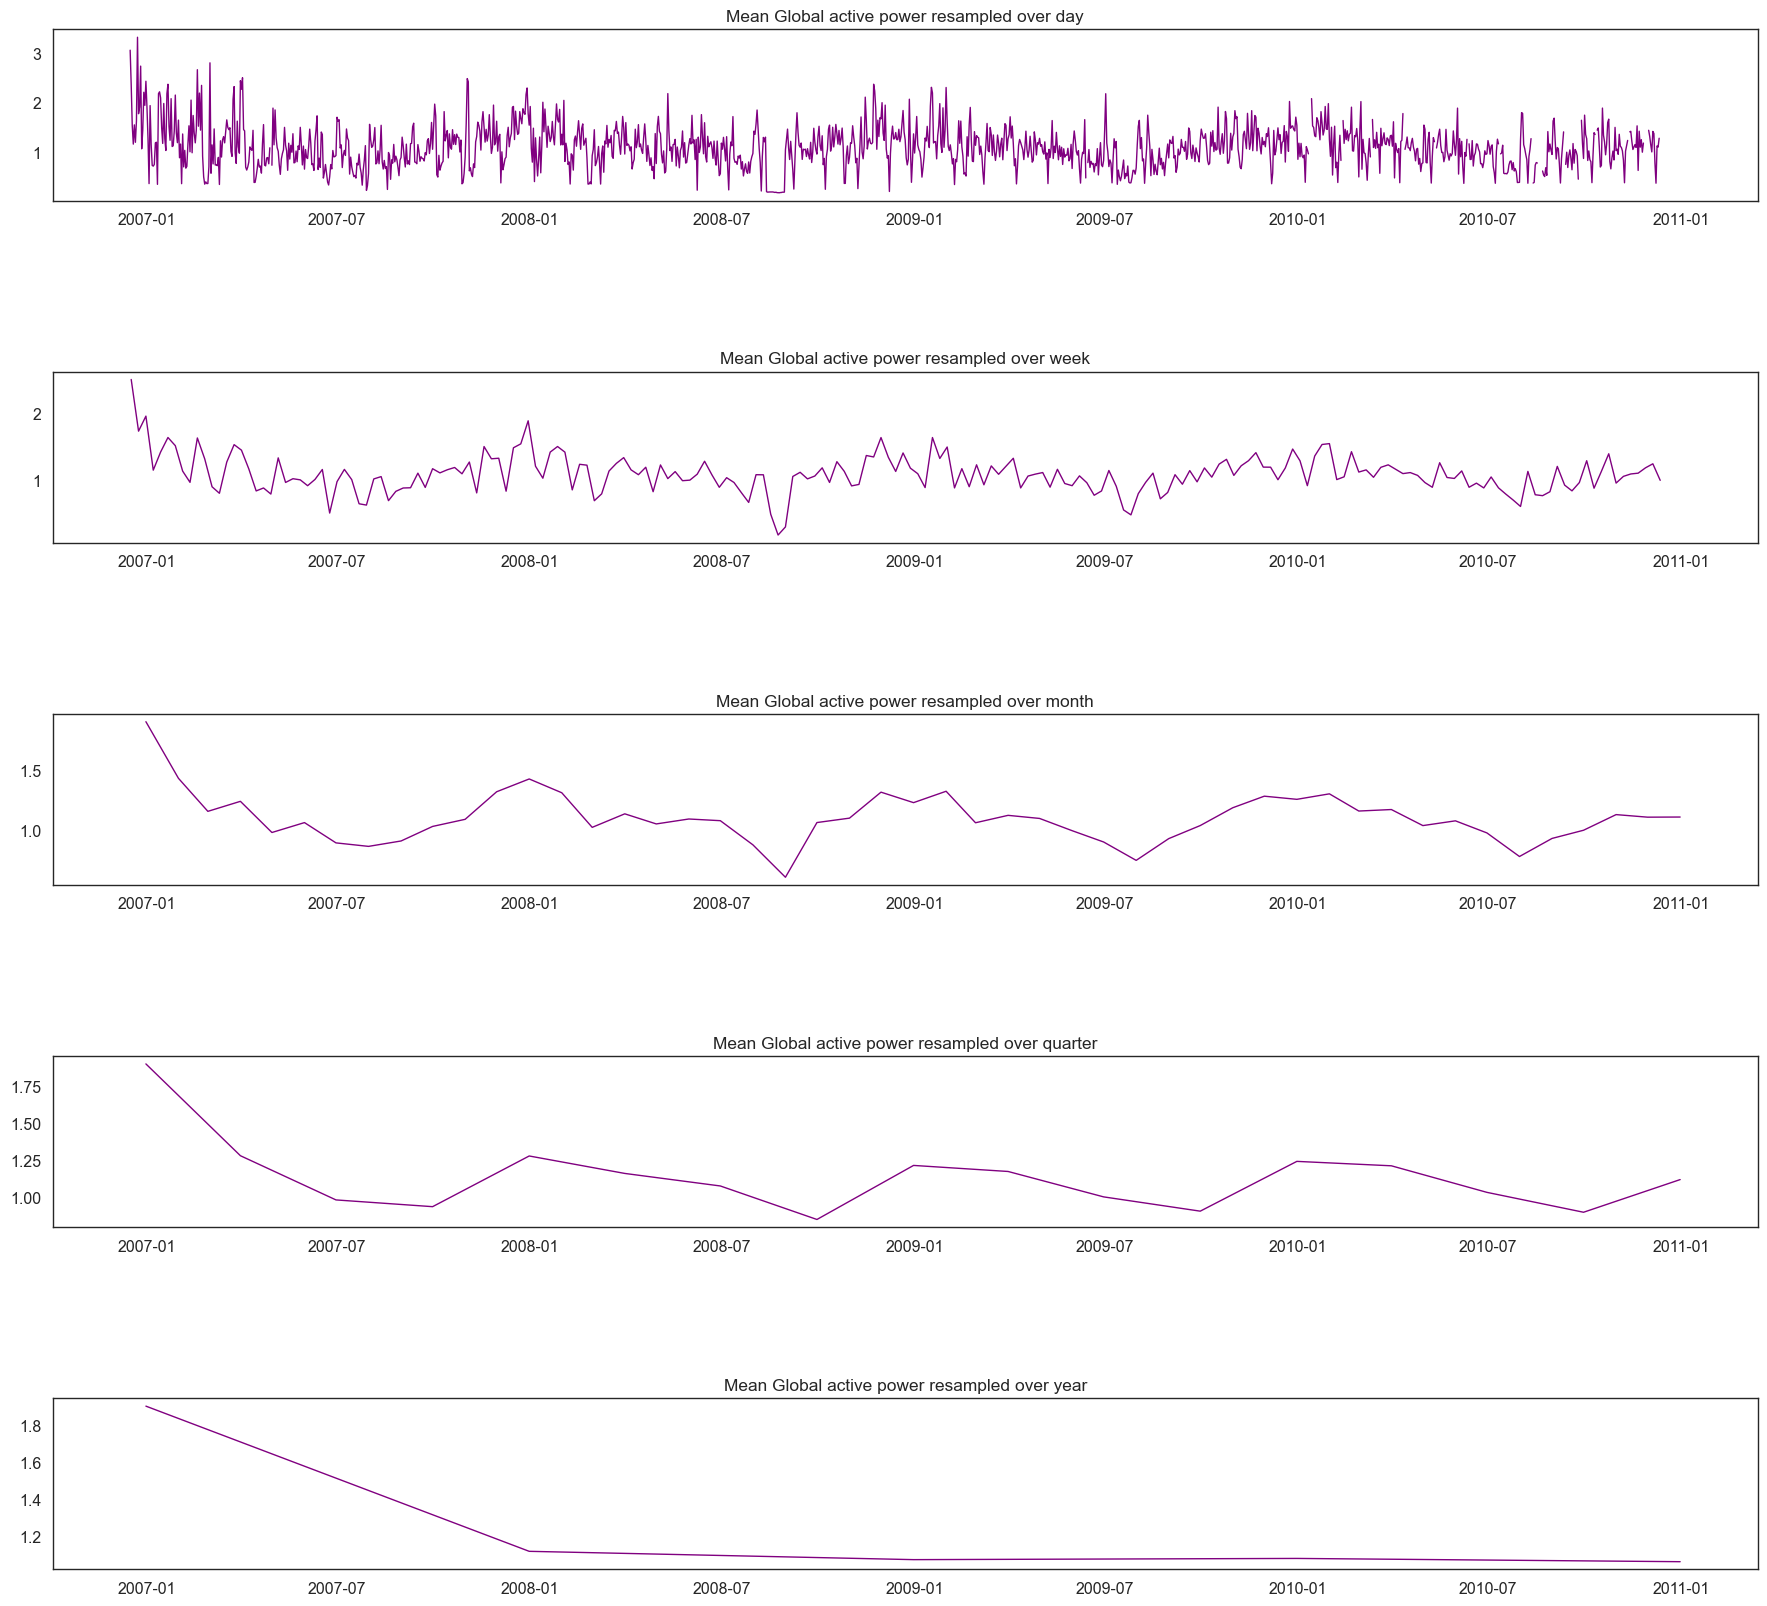

In [265]:
# Create a figure with specified size
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(data1['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(data1['Global_active_power'].resample('W').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(data1['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(data1['Global_active_power'].resample('Q').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(data1['Global_active_power'].resample('A').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

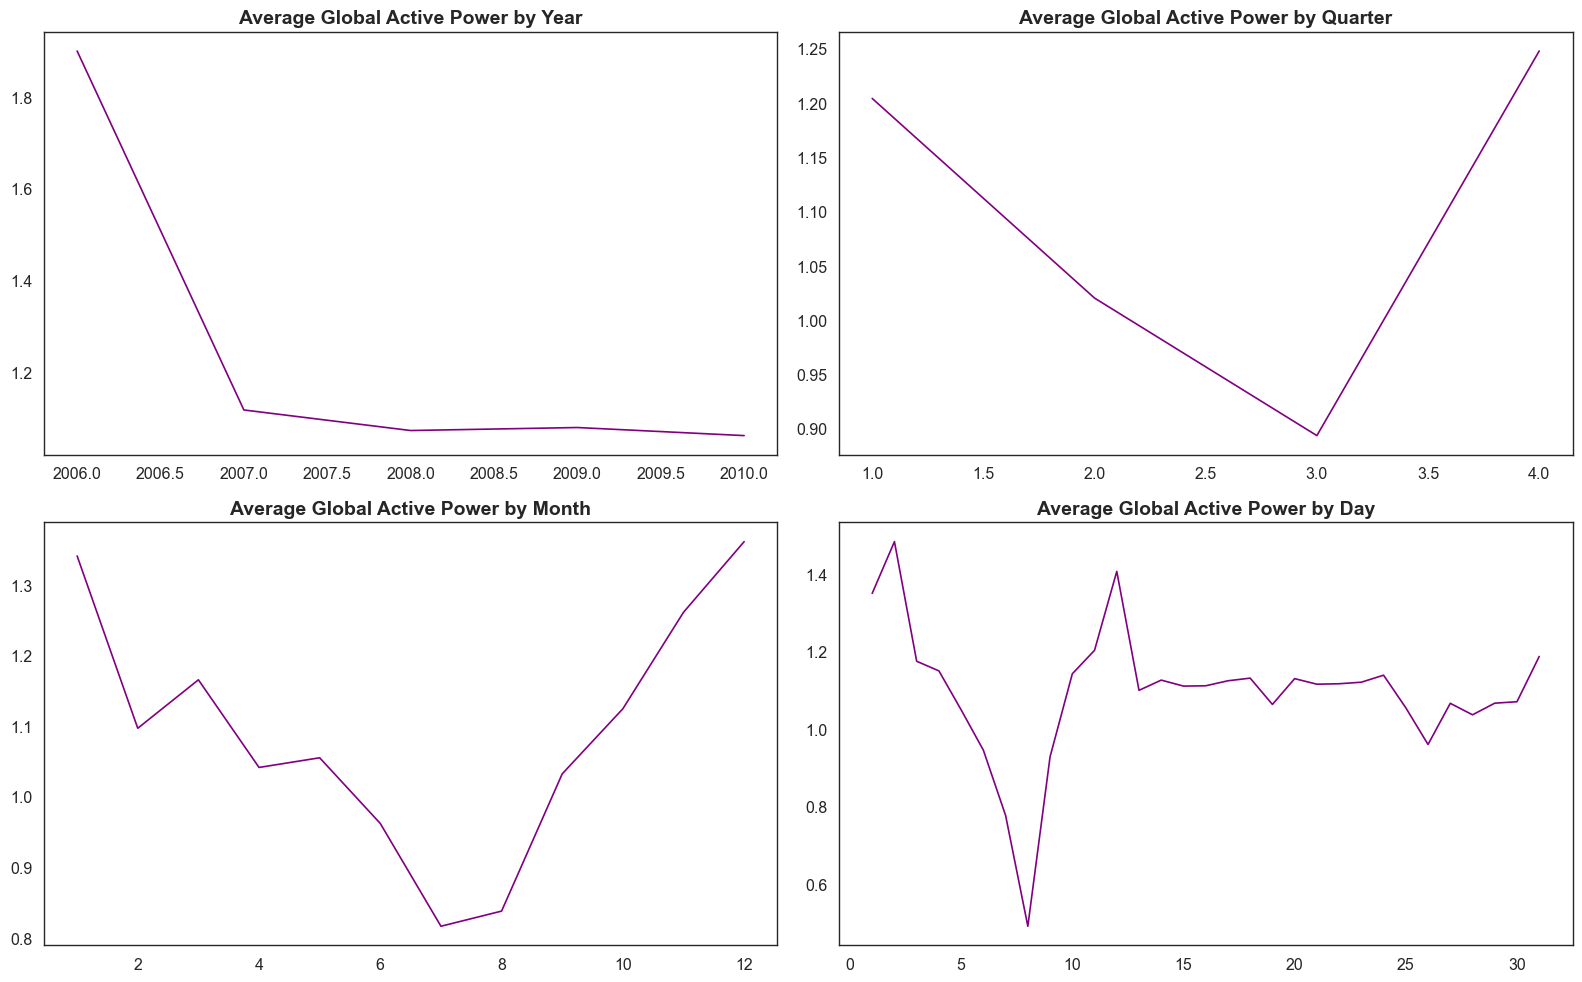

In [266]:
# Import the matplotlib library for plotting graphs
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns and set its size to 14x8
plt.figure(figsize=(16,10))

# First subplot in the first row, first column
plt.subplot(2,2,1)
# Group data by year and take the mean of the 'Global_active_power' column
grouped_by_year = data.groupby('year').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by year with red color
grouped_by_year.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Year' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')

# Second subplot in the first row, second column
plt.subplot(2,2,2)
# Group data by quarter and take the mean of the 'Global_active_power' column
grouped_by_quarter = data.groupby('quarter').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by quarter with blue color
grouped_by_quarter.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Quarter' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')

# Third subplot in the second row, first column
plt.subplot(2,2,3)
# Group data by month and take the mean of the 'Global_active_power' column
grouped_by_month = data.groupby('month').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by month with purple color
grouped_by_month.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Month' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')

# Fourth subplot in the second row, second column
plt.subplot(2,2,4)
# Group data by day and take the mean of the 'Global_active_power' column
grouped_by_day = data.groupby('day').Global_active_power.agg('mean')
# Plot the mean of 'Global_active_power' by day with green color
grouped_by_day.plot(color='purple')
# Set the x label to be empty
plt.xlabel('')
# Set the title to 'Average Global Active Power by Day' with font size 12 and font weight 'bold'
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')

# Use tight_layout to adjust the subplots so that they fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()


In [352]:
data

,date_time,Global_active_power,year,quarter,month,day,weekday
0,2006-12-16 17:24:00,4.2160,2006,4,12,16,0
1,2006-12-16 17:25:00,5.3600,2006,4,12,16,0
2,2006-12-16 17:26:00,5.3740,2006,4,12,16,0
3,2006-12-16 17:27:00,5.3880,2006,4,12,16,0
4,2006-12-16 17:28:00,3.6660,2006,4,12,16,0
...,...,...,...,...,...,...,...
2049275,2010-12-11 23:55:00,0.6900,2010,4,12,11,0
2049276,2010-12-11 23:56:00,0.6880,2010,4,12,11,0
2049277,2010-12-11 23:57:00,0.6880,2010,4,12,11,0
2049278,2010-12-11 23:58:00,0.6880,2010,4,12,11,0


In [267]:
def test_stationarity(timeseries):
    # Calculate rolling mean and standard deviation
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    # Plot original timeseries, rolling mean, and rolling standard deviation
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    # Add legend
    plt.legend(loc='best')
    # Add title
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

    # Perform and display results of Dickey-Fuller test
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                     index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [268]:
#test_stationarity(data1.Global_active_power.dropna())